<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [2]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [3]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [4]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [71]:
QUERY="""SELECT * FROM main"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [46]:
# your code goes here
df_box = df['CompTotal'].dropna(axis=0)

In [47]:
#Remove outliers
q1=df_box.quantile(0.25)
q3=df_box.quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit = q1-1.5*iqr

upper_bound=df_box>=upper_limit
lower_bound=df_box<=lower_limit
out_of_bound = upper_bound|lower_bound

df_box_clean=df_box[~out_of_bound]

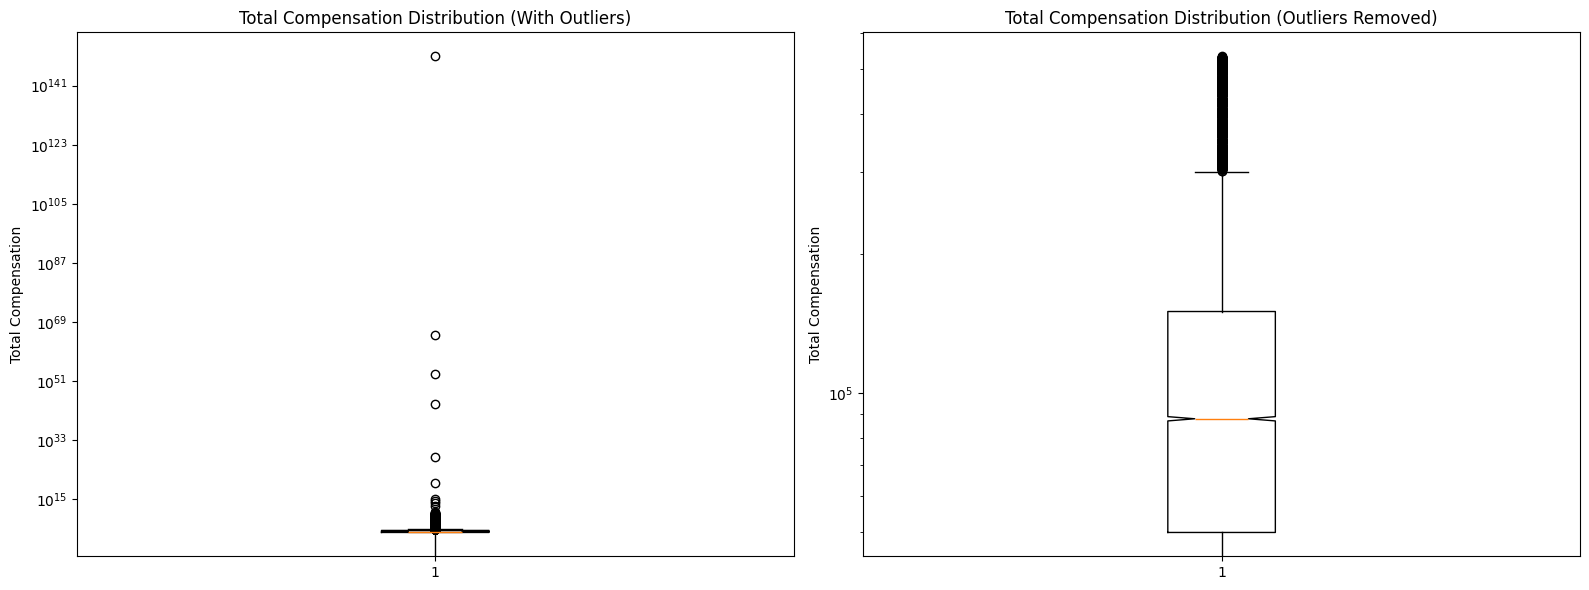

In [49]:
plt.figure(figsize=(16, 6))

# First plot: Boxplot for the original data (with outliers)
plt.subplot(1, 2, 1)
plt.boxplot(df_box, notch=True)
plt.title('Total Compensation Distribution (With Outliers)')
plt.ylabel('Total Compensation')
plt.yscale('log')

# Second plot: Boxplot for the cleaned data (without outliers)
plt.subplot(1, 2, 2)
plt.boxplot(df_box_clean, notch=True)
plt.title('Total Compensation Distribution (Outliers Removed)')
plt.ylabel('Total Compensation')
plt.yscale('log')


plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [77]:
df['Age']=df['Age'].replace({'years old':'', 'Under':'', 'years or older': '', 'Prefer not to say': 'NaN'}, regex=True)
df['Age'] = df['Age'].str.strip()
def clean_age(value):
    if isinstance(value, (int, float)):
        return float(value) 
    if '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    elif value.isdigit():
        return float(value)
    return None
df['Age'] = df['Age'].apply(clean_age)
df_age = df.dropna(subset= ['Age'], axis=0)

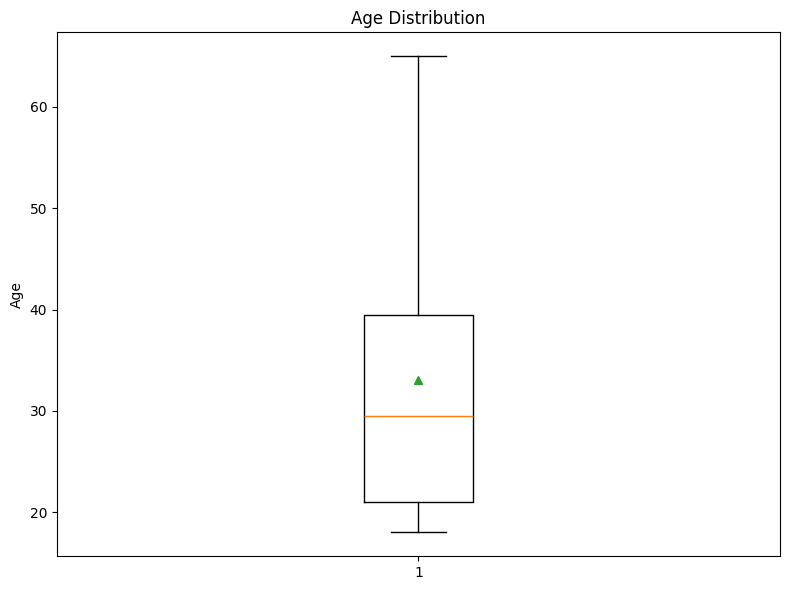

In [78]:
plt.figure(figsize=(8, 6))
plt.boxplot(data=df_age, x='Age', showmeans=True)
plt.title('Age Distribution')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [80]:
# your code goes here
QUERY="""SELECT * FROM main"""
df1 = pd.read_sql_query(QUERY, conn)

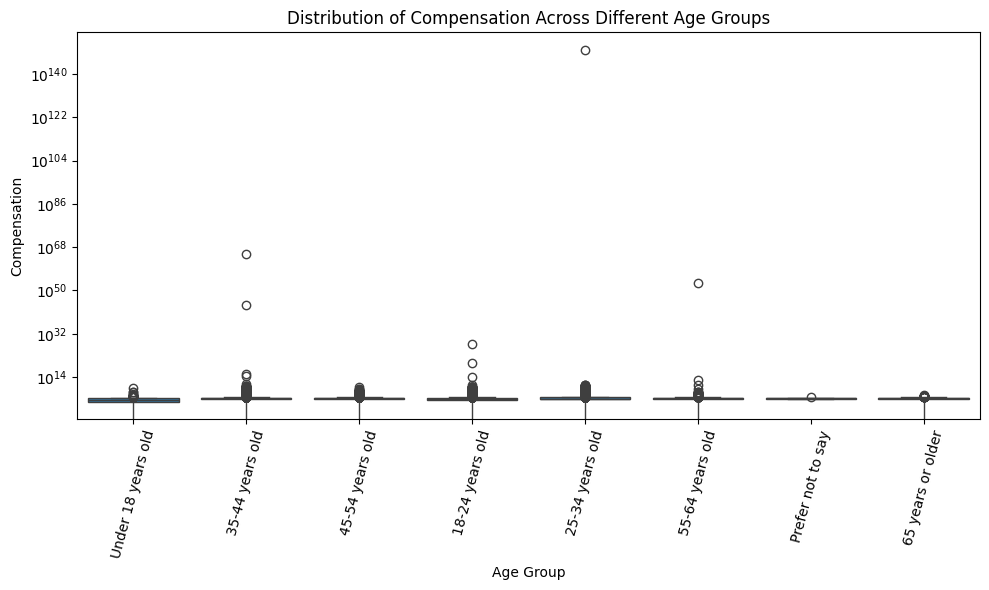

In [102]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='CompTotal', data=df1)

# Add labels and title
plt.title('Distribution of Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.xticks(rotation=75)
plt.ylabel('Compensation')
plt.yscale('log')

plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


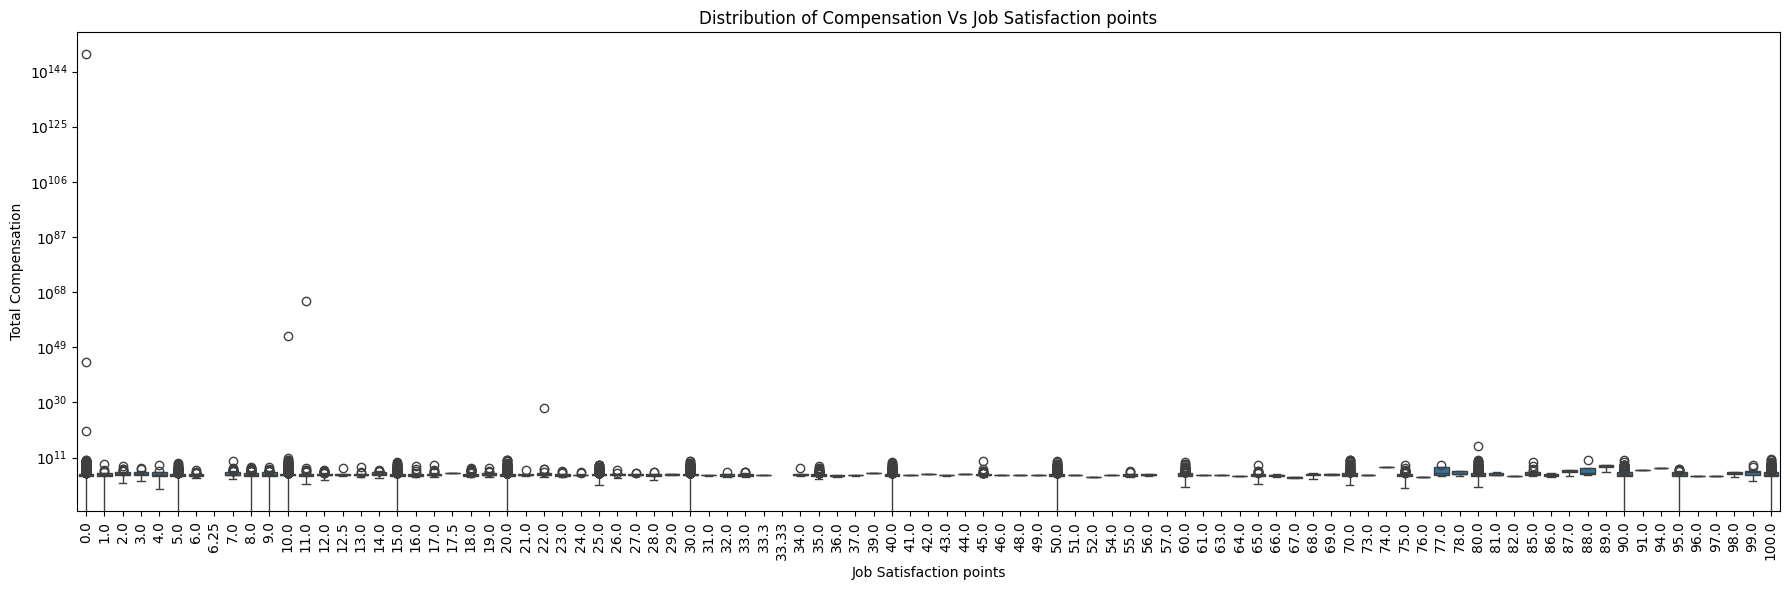

In [107]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df1)

# Add labels and title
plt.title('Distribution of Compensation Vs Job Satisfaction points')
plt.xlabel('Job Satisfaction points')
plt.xticks(rotation=90)
plt.ylabel('Total Compensation')
plt.yscale('log')

plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [110]:
# your code goes here
# Get the top 5 developer types by count (or another metric if needed)
top_5_dev_types = df1['DevType'].value_counts().head(5).index
df_top_5_dev_types = df1[df1['DevType'].isin(top_5_dev_types)]

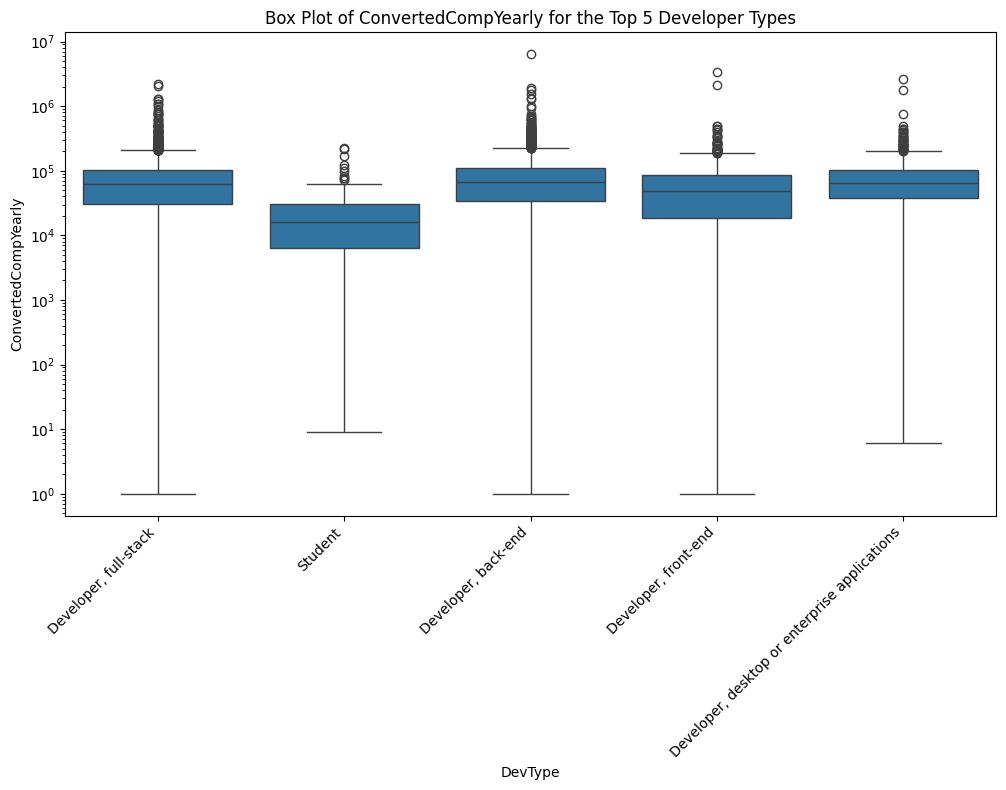

In [114]:
# Create the box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_5_dev_types)
plt.title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.yscale('log')
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [115]:
# your code goes here
top_5_countries = df1['Country'].value_counts().head(5).index
df_top_5_countries = df1[df1['Country'].isin(top_5_countries)]

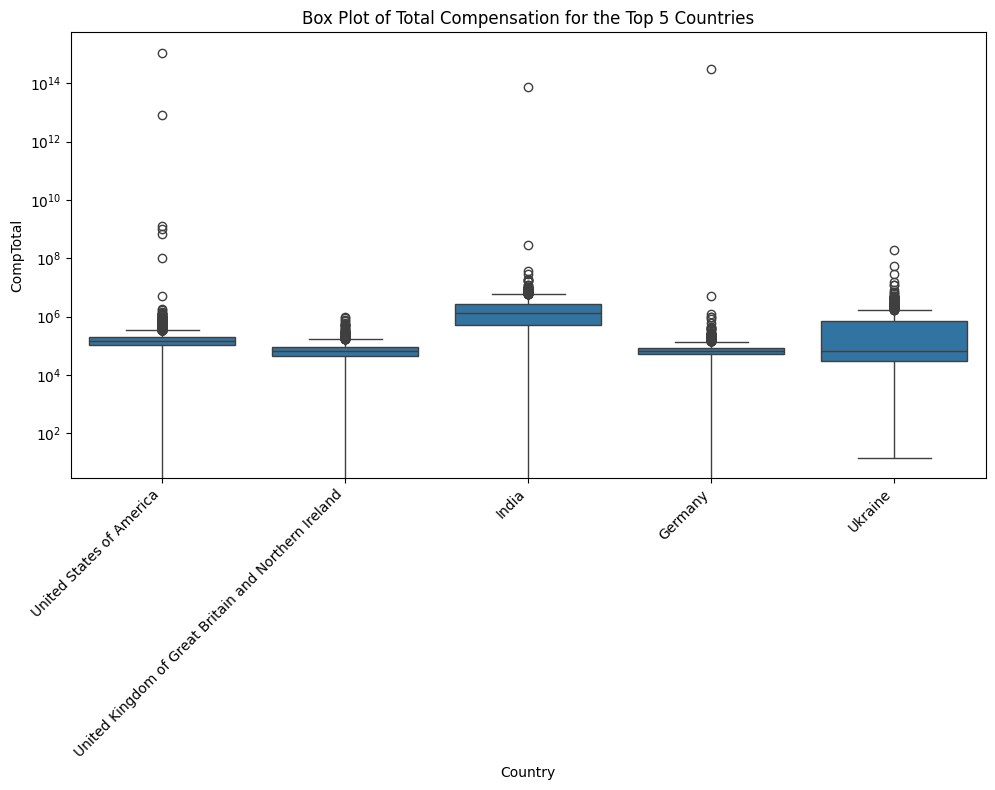

In [117]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top_5_countries)
plt.title('Box Plot of Total Compensation for the Top 5 Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.yscale('log')
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


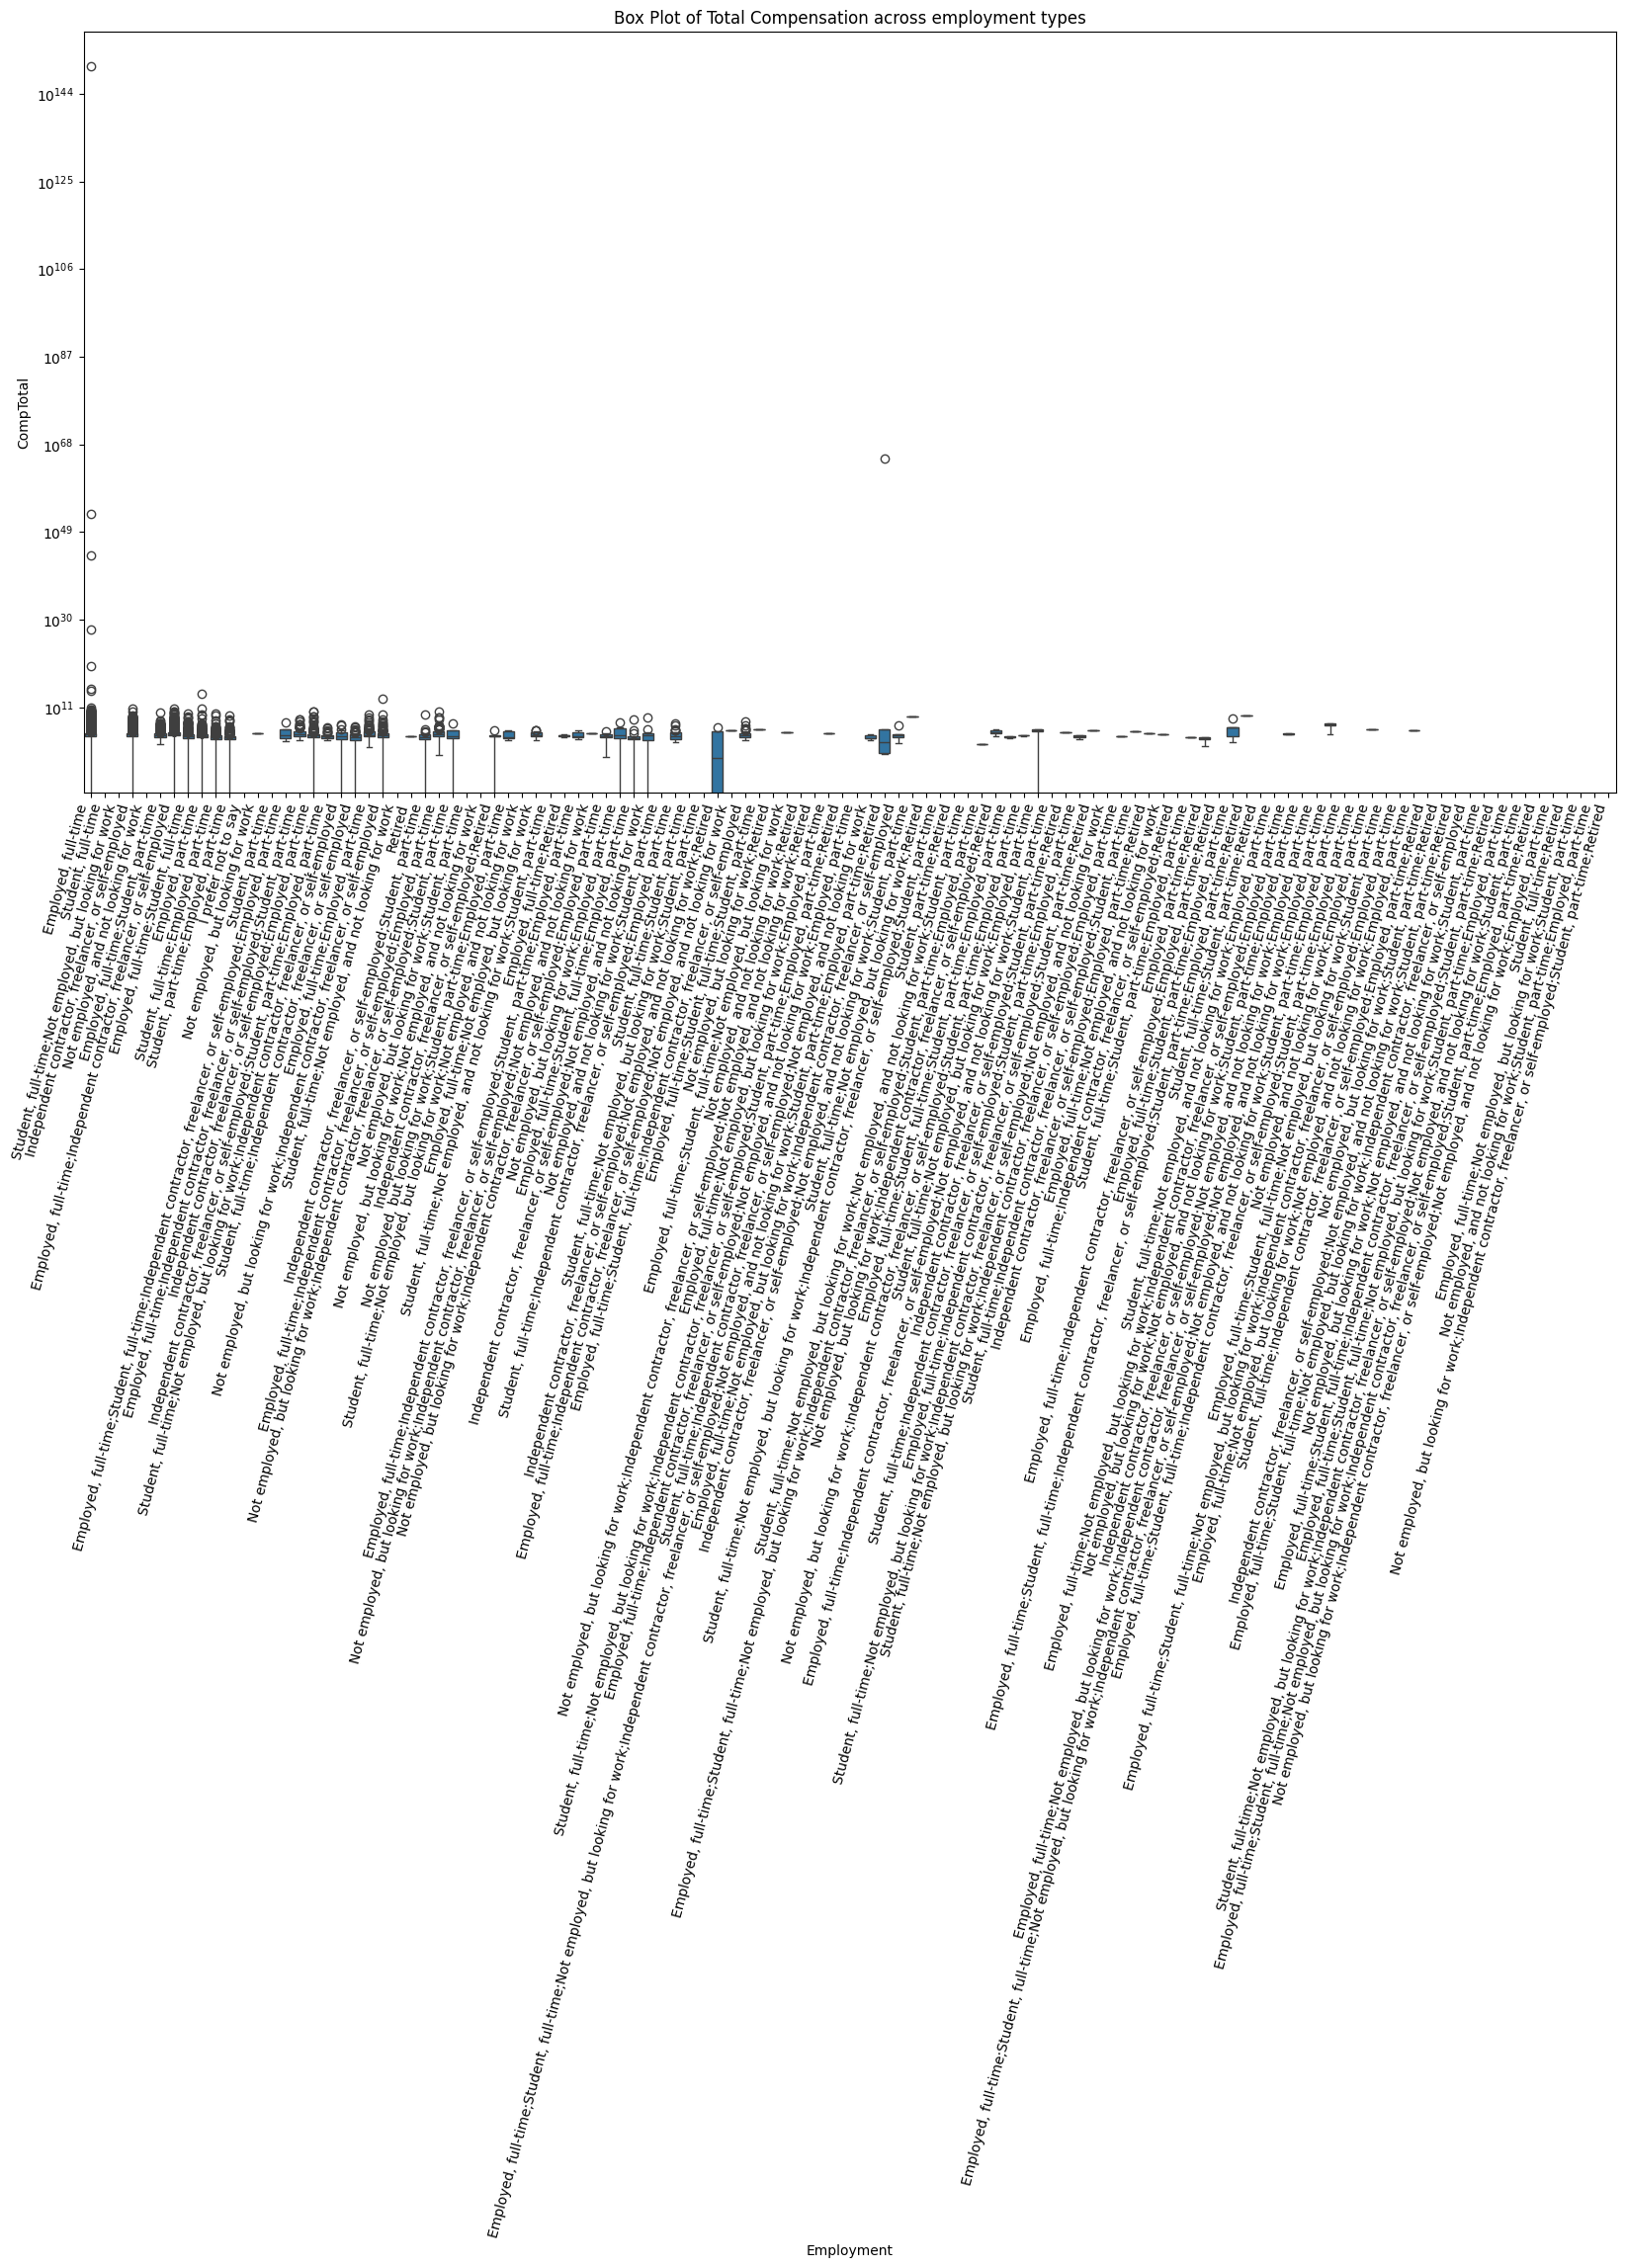

In [120]:
# your code goes here
plt.figure(figsize=(20, 10))
sns.boxplot(x='Employment', y='CompTotal', data=df1)
plt.title('Box Plot of Total Compensation across employment types')
plt.xticks(rotation=75, ha='right')  # Rotate x-axis labels for better readability
plt.yscale('log')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


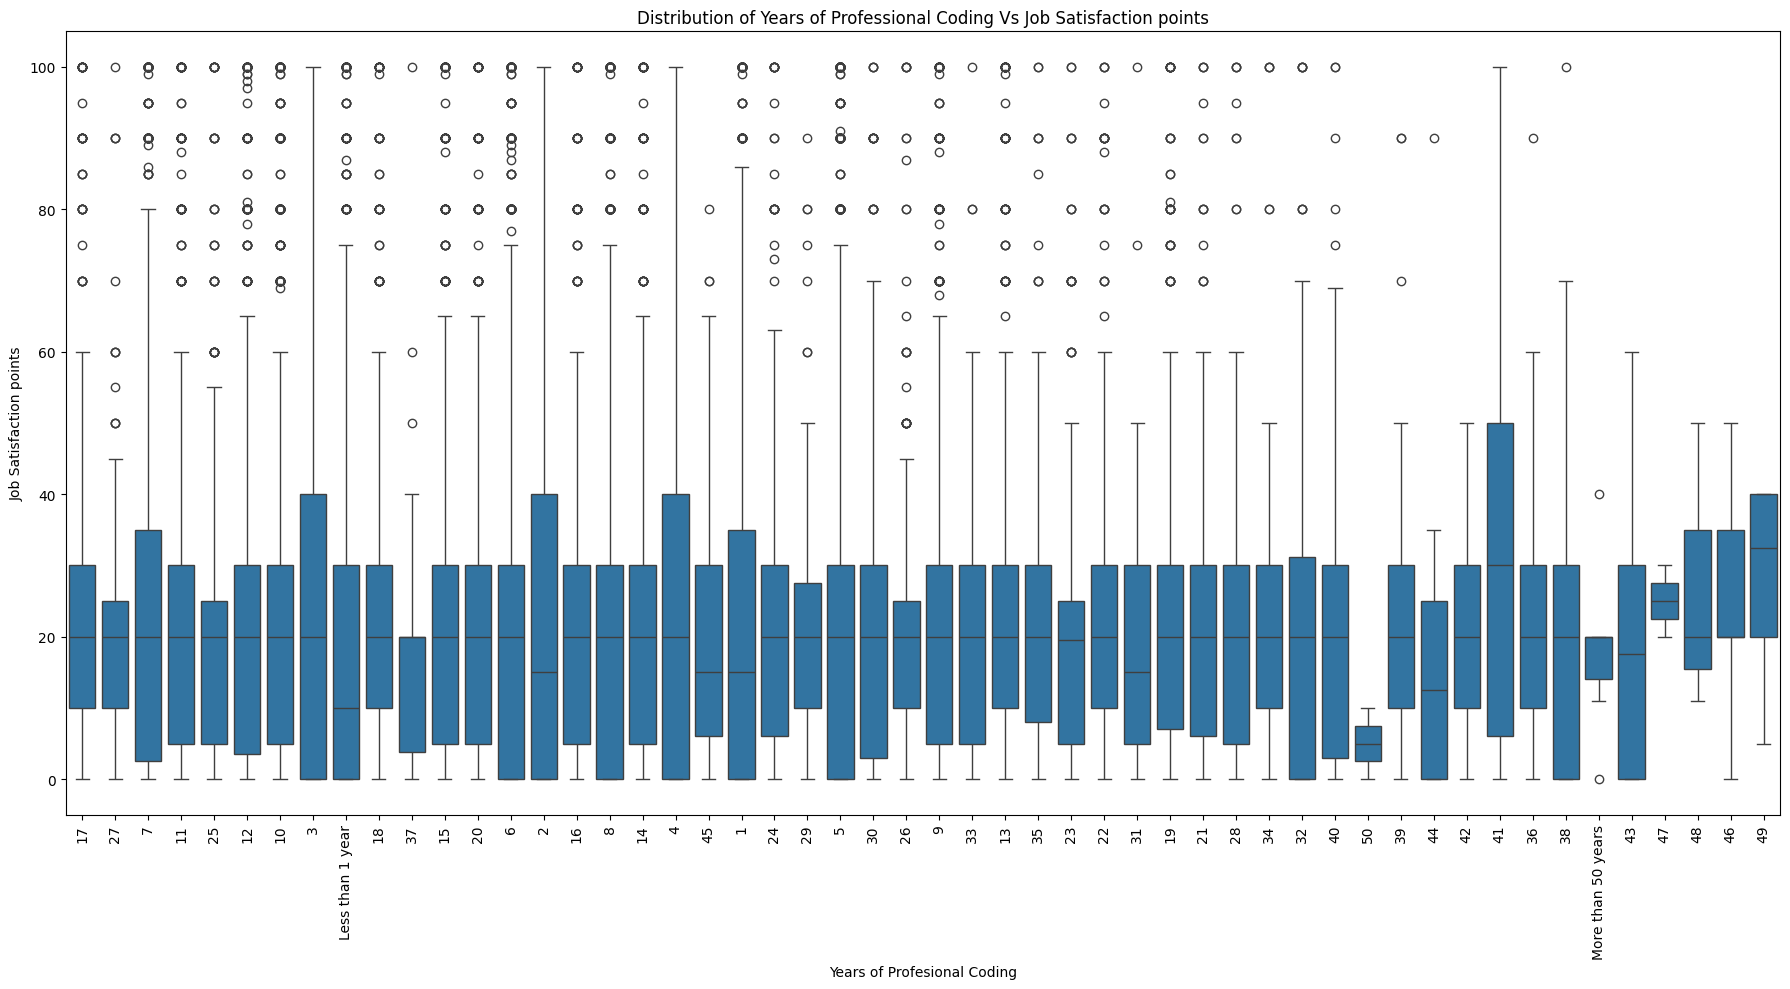

In [109]:
# your code goes here
plt.figure(figsize=(18, 10))
sns.boxplot(x='YearsCodePro', y='JobSatPoints_6', data=df1)

# Add labels and title
plt.title('Distribution of Years of Professional Coding Vs Job Satisfaction points')
plt.ylabel('Job Satisfaction points')
plt.xticks(rotation=90)
plt.xlabel('Years of Profesional Coding')

plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [121]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
